# Traveling Salesman Problem (TSP)

## Framework

The Traveling Salesman Problem (TSP) is composed of
- $n$ locations to visit, and
- a salesman who will make a tour.

The aim of a TSP is to **minimize the total cost of the tour** in such a way that **all the $n$ locations are visited only once** and **the tour starts and ends at the same location**.

## Model

|**Data** | |
|:---|:---|
|$i$ | Integers from $1$ to $n$ representing the nodes. |
|$c_{ij} > 0$ | The cost of travel from the node $i$ to the node $j$. |

|**Variables** | |
|:---|:---|
|$x_{ij} \in \{0,1\}$ | The decision either to travel from the note $i$ to the node $j$. |

Here we make the following interpretation on the variables $x_{ij}$:
$$
x_{ij} = 
\begin{cases}
1 & \text{if there is a travel from $i$ to $j$,} \\
0 & \text{if there is no travel from $i$ to $j$.}
\end{cases}
$$

### Objective function

The total cost of the tour is given by
$$
Z = \sum_{i = 1}^{n} \sum_{j = 1}^{n} c_{ij}x_{ij},
$$
where this cost is to be minimized.

### Constraints

- No self-visit: $$x_{ii} = 0, \qquad (\forall i = 1,\dots,n) \iff \sum_{i=1}^{n} x_{ii} = 0.$$
- Unique inbound: $$\sum_{i=1}^{n} x_{ij} = 1, \qquad (\forall j = 1,\dots,n).$$
- Unique outbound: $$\sum_{j=1}^{n} x_{ij} = 1, \qquad (\forall i = 1,\dots,n).$$
- No subtour: $$\sum_{i,j \in Q} x_{ij} \leq |Q| - 1, \qquad (\forall Q \subsetneq \{1,\dots,n\},\; |Q| \geq 2).$$

### First Example

Consider the simple case that consists of $4$ nodes with the following traveling costs between nodes.

| Nodes | 1 | 2 | 3 | 4 |
|:---:|:---:|:---:|:---:|:---:|
| **1** | - | 10 | 9 | 11 |
| **2** | 7 | - | 12 | 10 |
| **3** | 11 | 9 | - | 12 |
| **4** | 10 | 8 | 8 | - |

In [1]:
import numpy as np
from pyscipopt import quicksum, Model

In [2]:
n = 4
N = np.arange(4)
c = np.array([
    [0, 10, 9, 11],
    [7, 0, 12, 10],
    [11, 9, 0, 12],
    [10, 8, 8, 0]
])

In [29]:
tsp = Model()

# Define x[i][j]
x = [[tsp.addVar(vtype='B') for j in range(n)] for i in range(n)]

# Define objective function
tsp.setObjective(quicksum(c[i][j]*x[i][j] for i in range(n) for j in range(n)), sense='minimize')

# Constraints
# No self-visit.
tsp.addCons(quicksum(x[i][i] for i in range(n)) == 0)
# Unique inbound.
for j in range(n):
    tsp.addCons(quicksum(x[i][j] for i in range(n)) == 1)
# Unique outbound.
for i in range(n):
    tsp.addCons(quicksum(x[i][j] for j in range(n)) == 1)
# No subtour.
tsp.addCons(x[0][1] + x[1][0] <= 1)
tsp.addCons(x[0][2] + x[2][0] <= 1)
tsp.addCons(x[0][3] + x[3][0] <= 1)
tsp.addCons(x[1][2] + x[2][1] <= 1)
tsp.addCons(x[1][3] + x[3][1] <= 1)
tsp.addCons(x[2][3] + x[3][2] <= 1)
tsp.addCons(x[0][1] + x[1][0] + x[0][2] + x[2][0] + x[1][2] + x[2][1] <= 2)
tsp.addCons(x[0][1] + x[1][0] + x[0][3] + x[3][0] + x[1][3] + x[3][1] <= 2)
tsp.addCons(x[0][2] + x[2][0] + x[0][3] + x[3][0] + x[2][3] + x[3][2] <= 2)
tsp.addCons(x[1][2] + x[2][1] + x[1][3] + x[3][1] + x[2][3] + x[3][2] <= 2)

c19

In [30]:
tsp.optimize()
SOL = tsp.getBestSol()

presolving:
(round 1, fast)       4 del vars, 1 del conss, 0 add conss, 4 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 14 clqs
(round 2, exhaustive) 4 del vars, 1 del conss, 0 add conss, 4 chg bounds, 0 chg sides, 0 chg coeffs, 18 upgd conss, 0 impls, 14 clqs
   (0.0s) probing cycle finished: starting next cycle
   (0.0s) symmetry computation started: requiring (bin +, int +, cont +), (fixed: bin -, int -, cont -)
   (0.0s) no symmetry present (symcode time: 0.00)
presolving (3 rounds: 3 fast, 2 medium, 2 exhaustive):
 4 deleted vars, 1 deleted constraints, 0 added constraints, 4 tightened bounds, 0 added holes, 0 changed sides, 0 changed coefficients
 0 implications, 14 cliques
presolved problem has 12 variables (12 bin, 0 int, 0 impl, 0 cont) and 18 constraints
      4 constraints of type <knapsack>
     14 constraints of type <setppc>
transformed objective value is always integral (scale: 1)
Presolving Time: 0.00

 time | node  | left  |LP iter|LP it/n|mem/heur|mdpt

In [31]:
for i in range(n):
    for j in range(n):
        print(f"x_{i}_{j} = {SOL[x[i][j]]}")

x_0_0 = -0.0
x_0_1 = 0.0
x_0_2 = 0.0
x_0_3 = 1.0
x_1_0 = 1.0
x_1_1 = -0.0
x_1_2 = 0.0
x_1_3 = 0.0
x_2_0 = 0.0
x_2_1 = 1.0
x_2_2 = -0.0
x_2_3 = 0.0
x_3_0 = 0.0
x_3_1 = 0.0
x_3_2 = 1.0
x_3_3 = -0.0


----

### Using `itertools.combinations`

In [ ]:
from itertools import combinations

In [22]:
TSP = Model()

x = [[TSP.addVar(vtype='B') for j in range(n)] for i in range(n)]

TSP.setObjective(quicksum(c[i][j]*x[i][j] for i in range(n) for j in range(n)), sense='minimize')

TSP.addCons(quicksum(x[i][i] for i in range(n)) == 0)
for j in range(n):
    TSP.addCons(quicksum(x[i][j] for i in range(n)) == 1)
for i in range(n):
    TSP.addCons(quicksum(x[i][j] for j in range(n)) == 1)
for q in range(2,n):
    for combi in combinations(N,q):
        TSP.addCons(quicksum(x[i][j] for i in combi for j in combi) <= q-1 )

In [14]:
TSP.hideOutput()
TSP.optimize()
SOL = TSP.getBestSol()

In [15]:
import networkx as nx

In [16]:
X = np.array([[SOL[x[i][j]] for j in range(n)] for i in range(n)])

G = nx.DiGraph(X)
labeldict = {}
for i in range(n):
    labeldict[i] = f"{i}"

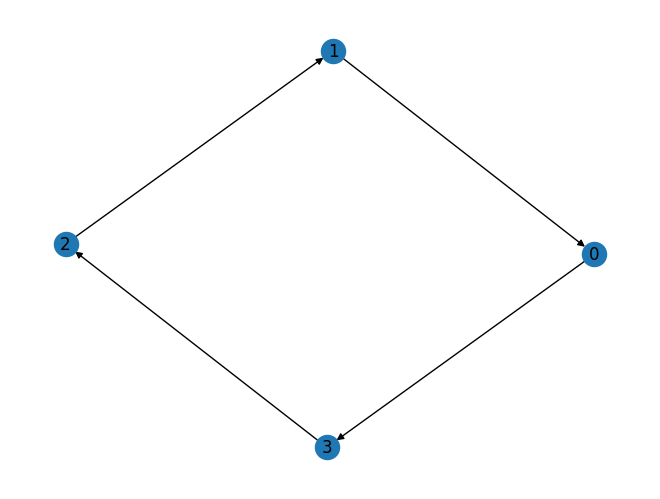

In [12]:
nx.draw(G, labels=labeldict)

----